<a href="https://colab.research.google.com/github/mengwangk/dl-projects/blob/master/lstm_s1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM

## Data Preprocessing

In [0]:
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split

In [0]:
# path = Path('datasets/stocks/mbb.csv')
path = Path('mbb.csv')

In [0]:
df = pd.read_csv(path)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 7 columns):
Date        1893 non-null object
Price       1893 non-null float64
Open        1893 non-null float64
High        1893 non-null float64
Low         1893 non-null float64
Vol.        1893 non-null object
Change %    1893 non-null object
dtypes: float64(4), object(3)
memory usage: 103.6+ KB


In [6]:
df.head(10)

,Date,Price,Open,High,Low,Vol.,Change %
0,"May 24, 2019",8.99,9.00,9.05,8.96,4.78M,-0.33%
1,"May 23, 2019",9.02,8.75,9.10,8.75,9.07M,0.33%
2,"May 21, 2019",8.99,9.00,9.04,8.95,5.88M,-0.11%
3,"May 17, 2019",9.00,9.00,9.02,8.98,5.44M,0.45%
4,"May 16, 2019",8.96,9.01,9.02,8.96,6.56M,-0.55%
5,"May 15, 2019",9.01,8.98,9.04,8.95,14.21M,0.56%
6,"May 14, 2019",8.96,8.90,8.99,8.90,9.81M,-0.22%
7,"May 13, 2019",8.98,8.98,9.00,8.91,9.16M,0.11%
8,"May 10, 2019",8.97,8.97,8.99,8.91,9.95M,0.00%
9,"May 09, 2019",8.97,8.98,9.00,8.96,11.64M,0.00%


In [0]:
# Convert the date column
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.head(10)

,Date,Price,Open,High,Low,Vol.,Change %
0,2019-05-24,8.99,9.00,9.05,8.96,4.78M,-0.33%
1,2019-05-23,9.02,8.75,9.10,8.75,9.07M,0.33%
2,2019-05-21,8.99,9.00,9.04,8.95,5.88M,-0.11%
3,2019-05-17,9.00,9.00,9.02,8.98,5.44M,0.45%
4,2019-05-16,8.96,9.01,9.02,8.96,6.56M,-0.55%
5,2019-05-15,9.01,8.98,9.04,8.95,14.21M,0.56%
6,2019-05-14,8.96,8.90,8.99,8.90,9.81M,-0.22%
7,2019-05-13,8.98,8.98,9.00,8.91,9.16M,0.11%
8,2019-05-10,8.97,8.97,8.99,8.91,9.95M,0.00%
9,2019-05-09,8.97,8.98,9.00,8.96,11.64M,0.00%


In [0]:
# Sort date column ascending
df.sort_values(by=['Date'], inplace=True)

In [10]:
df.head(30)

,Date,Price,Open,High,Low,Vol.,Change %
1892,2011-09-02,8.72,9.00,9.00,8.69,12.92M,0.00%
1891,2011-09-05,8.73,8.72,8.75,8.70,12.39M,0.11%
1890,2011-09-06,8.68,8.72,8.72,8.68,11.48M,-0.57%
1889,2011-09-07,8.67,8.70,8.70,8.64,5.73M,-0.12%
1888,2011-09-08,8.69,8.71,8.74,8.67,4.69M,0.23%
1887,2011-09-09,8.69,8.70,8.70,8.68,5.09M,0.00%
1886,2011-09-12,8.61,8.65,8.68,8.55,8.59M,-0.92%
1885,2011-09-13,8.60,8.58,8.61,8.55,3.62M,-0.12%
1884,2011-09-14,8.60,8.64,8.64,8.57,10.24M,0.00%
1883,2011-09-15,8.59,8.62,8.62,8.57,7.59M,-0.12%


#### Split into monthly means

In [11]:
# df['Year'] = pd.DatetimeIndex(df["Date"]).year
# df['Month'] = pd.DatetimeIndex(df["Date"]).month
df_temp = df
df_temp.reset_index(inplace=True, drop=True)
number_of_days = 5
df_temp['GroupId'] = df_temp.index
df_temp['GroupId'] = df_temp.apply(lambda x: df_temp['GroupId'] // number_of_days)
df_grouped_mean = df_temp.groupby(['GroupId'], as_index=False).mean()
print(df_grouped_mean.head(10), '\n\n', len(df_grouped_mean))
print(df.head(10), '\n\n', len(df))

   GroupId  Price   Open   High    Low
0        0  8.698  8.770  8.782  8.676
1        1  8.618  8.638  8.650  8.584
2        2  8.408  8.508  8.526  8.352
3        3  7.866  7.856  7.996  7.698
4        4  8.030  7.972  8.086  7.906
5        5  8.260  8.256  8.300  8.212
6        6  8.254  8.272  8.300  8.218
7        7  8.304  8.318  8.358  8.278
8        8  8.264  8.330  8.338  8.232
9        9  8.244  8.230  8.282  8.178 

 379
        Date  Price  Open  High   Low    Vol. Change %  GroupId
0 2011-09-02   8.72  9.00  9.00  8.69  12.92M    0.00%        0
1 2011-09-05   8.73  8.72  8.75  8.70  12.39M    0.11%        0
2 2011-09-06   8.68  8.72  8.72  8.68  11.48M   -0.57%        0
3 2011-09-07   8.67  8.70  8.70  8.64   5.73M   -0.12%        0
4 2011-09-08   8.69  8.71  8.74  8.67   4.69M    0.23%        0
5 2011-09-09   8.69  8.70  8.70  8.68   5.09M    0.00%        1
6 2011-09-12   8.61  8.65  8.68  8.55   8.59M   -0.92%        1
7 2011-09-13   8.60  8.58  8.61  8.55   3.62M   -0.1

In [0]:
df = df_grouped_mean

In [0]:
# train_test_split?
# Split to training and test set without shuffling
training_set, test_set = train_test_split(df, test_size=0.10, shuffle=False)

In [14]:
print(len(training_set));training_set.head(10)

341


,GroupId,Price,Open,High,Low
0,0,8.698,8.770,8.782,8.676
1,1,8.618,8.638,8.650,8.584
2,2,8.408,8.508,8.526,8.352
3,3,7.866,7.856,7.996,7.698
4,4,8.030,7.972,8.086,7.906
5,5,8.260,8.256,8.300,8.212
6,6,8.254,8.272,8.300,8.218
7,7,8.304,8.318,8.358,8.278
8,8,8.264,8.330,8.338,8.232
9,9,8.244,8.230,8.282,8.178


In [15]:
print(len(test_set));test_set.head(10)

38


,GroupId,Price,Open,High,Low
341,341,9.790,9.802,9.840,9.776
342,342,9.874,9.840,9.892,9.822
343,343,9.968,9.996,10.040,9.916
344,344,9.870,9.882,9.930,9.800
345,345,9.772,9.794,9.846,9.740
346,346,9.774,9.752,9.808,9.722
347,347,9.692,9.698,9.720,9.652
348,348,9.520,9.478,9.600,9.382
349,349,9.588,9.580,9.610,9.514
350,350,9.392,9.436,9.486,9.330


In [16]:
# Use the Open price
training_set = training_set.iloc[:,2:3].values
print(training_set)

[[ 8.77 ]
 [ 8.638]
 [ 8.508]
 [ 7.856]
 [ 7.972]
 [ 8.256]
 [ 8.272]
 [ 8.318]
 [ 8.33 ]
 [ 8.23 ]
 [ 8.308]
 [ 8.072]
 [ 8.308]
 [ 8.174]
 [ 8.236]
 [ 8.366]
 [ 8.362]
 [ 8.254]
 [ 8.22 ]
 [ 8.214]
 [ 8.368]
 [ 8.522]
 [ 8.646]
 [ 8.742]
 [ 8.742]
 [ 8.718]
 [ 8.77 ]
 [ 8.824]
 [ 8.886]
 [ 8.862]
 [ 8.868]
 [ 8.758]
 [ 8.69 ]
 [ 8.744]
 [ 8.512]
 [ 8.512]
 [ 8.662]
 [ 8.734]
 [ 8.726]
 [ 8.732]
 [ 8.712]
 [ 8.712]
 [ 8.754]
 [ 8.736]
 [ 8.754]
 [ 8.81 ]
 [ 8.906]
 [ 9.04 ]
 [ 9.184]
 [ 9.142]
 [ 9.172]
 [ 9.304]
 [ 9.012]
 [ 9.09 ]
 [ 8.954]
 [ 9.104]
 [ 9.058]
 [ 9.036]
 [ 9.042]
 [ 9.052]
 [ 9.018]
 [ 9.058]
 [ 9.066]
 [ 9.03 ]
 [ 9.078]
 [ 9.062]
 [ 9.05 ]
 [ 9.038]
 [ 8.93 ]
 [ 8.948]
 [ 8.986]
 [ 8.94 ]
 [ 9.134]
 [ 9.136]
 [ 9.192]
 [ 9.126]
 [ 9.392]
 [ 9.476]
 [ 9.646]
 [ 9.644]
 [ 9.626]
 [ 9.786]
 [10.136]
 [10.096]
 [10.076]
 [10.176]
 [10.36 ]
 [10.272]
 [10.172]
 [10.3  ]
 [10.404]
 [10.472]
 [10.632]
 [10.652]
 [10.352]
 [10.464]
 [10.098]
 [ 9.862]
 [ 9.938]
 [10.082]


In [17]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
print(training_set)

[[0.36668738]
 [0.32566812]
 [0.28527035]
 [0.08266004]
 [0.11870727]
 [0.20696085]
 [0.21193288]
 [0.22622747]
 [0.22995649]
 [0.19888129]
 [0.22311995]
 [0.14978247]
 [0.22311995]
 [0.18147918]
 [0.2007458 ]
 [0.24114357]
 [0.23990056]
 [0.20633934]
 [0.19577377]
 [0.19390926]
 [0.24176507]
 [0.28962088]
 [0.32815413]
 [0.35798633]
 [0.35798633]
 [0.35052828]
 [0.36668738]
 [0.38346799]
 [0.40273462]
 [0.39527657]
 [0.39714108]
 [0.36295836]
 [0.34182722]
 [0.35860783]
 [0.28651336]
 [0.28651336]
 [0.33312617]
 [0.35550031]
 [0.35301429]
 [0.35487881]
 [0.34866377]
 [0.34866377]
 [0.36171535]
 [0.35612181]
 [0.36171535]
 [0.37911746]
 [0.40894966]
 [0.45059043]
 [0.49533872]
 [0.48228713]
 [0.4916097 ]
 [0.53262896]
 [0.44188937]
 [0.46612803]
 [0.42386576]
 [0.47047856]
 [0.45618397]
 [0.44934742]
 [0.45121193]
 [0.45431945]
 [0.44375388]
 [0.45618397]
 [0.45866998]
 [0.44748291]
 [0.46239901]
 [0.45742697]
 [0.45369795]
 [0.44996892]
 [0.41640771]
 [0.42200124]
 [0.43380982]
 [0.41

In [18]:
n = len(training_set); n

341

In [19]:
# Getting the inputs and the ouputs
# Restricting the input and output based on how LSTM functions.
X_train = training_set[0:n-1]
y_train = training_set[1:n]
print(X_train); print(len(X_train))
print(y_train); print(len(y_train))

[[0.36668738]
 [0.32566812]
 [0.28527035]
 [0.08266004]
 [0.11870727]
 [0.20696085]
 [0.21193288]
 [0.22622747]
 [0.22995649]
 [0.19888129]
 [0.22311995]
 [0.14978247]
 [0.22311995]
 [0.18147918]
 [0.2007458 ]
 [0.24114357]
 [0.23990056]
 [0.20633934]
 [0.19577377]
 [0.19390926]
 [0.24176507]
 [0.28962088]
 [0.32815413]
 [0.35798633]
 [0.35798633]
 [0.35052828]
 [0.36668738]
 [0.38346799]
 [0.40273462]
 [0.39527657]
 [0.39714108]
 [0.36295836]
 [0.34182722]
 [0.35860783]
 [0.28651336]
 [0.28651336]
 [0.33312617]
 [0.35550031]
 [0.35301429]
 [0.35487881]
 [0.34866377]
 [0.34866377]
 [0.36171535]
 [0.35612181]
 [0.36171535]
 [0.37911746]
 [0.40894966]
 [0.45059043]
 [0.49533872]
 [0.48228713]
 [0.4916097 ]
 [0.53262896]
 [0.44188937]
 [0.46612803]
 [0.42386576]
 [0.47047856]
 [0.45618397]
 [0.44934742]
 [0.45121193]
 [0.45431945]
 [0.44375388]
 [0.45618397]
 [0.45866998]
 [0.44748291]
 [0.46239901]
 [0.45742697]
 [0.45369795]
 [0.44996892]
 [0.41640771]
 [0.42200124]
 [0.43380982]
 [0.41

In [0]:
# Reshaping - Adding time interval as a dimension for input.
X_train = np.reshape(X_train, (n-1, 1, 1))

In [21]:
print(X_train.shape)

(340, 1, 1)


## Build the Network

In [22]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [23]:
regressor = Sequential()

# 4 memory units, sigmoid activation function and (None time interval with 1 attribute as input)
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# 1 neuron in the output layer for 1 dimensional output
regressor.add(Dense(units = 1))

In [0]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [26]:
regressor.fit(X_train, y_train, batch_size = 32, epochs = 100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
340/340 [==============================] - 3s 9ms/step - loss: 0.1551
Epoch 2/100
340/340 [==============================] - 0s 144us/step - loss: 0.1398
Epoch 3/100
340/340 [==============================] - 0s 145us/step - loss: 0.1260
Epoch 4/100
340/340 [==============================] - 0s 145us/step - loss: 0.1133
Epoch 5/100
340/340 [==============================] - 0s 144us/step - loss: 0.1023
Epoch 6/100
340/340 [==============================] - 0s 153us/step - loss: 0.0927
Epoch 7/100
340/340 [==============================] - 0s 153us/step - loss: 0.0844
Epoch 8/100
340/340 [==============================] - 0s 146us/step - loss: 0.0771
Epoch 9/100
340/340 [==============================] - 0s 154us/step - loss: 0.0713
Epoch 10/100
340/340 [==============================] - 0s 154us/step - loss: 0.0661
Epoch 11/100
340/340 [==============================] - 0s 150us/step - loss: 0.0621
Epoch 12/100
340/340 [======

## Prediction

In [27]:
real_stock_price = test_set.iloc[:,2:3].values; len(real_stock_price)

38

In [28]:
# Getting the predicted stock price of 2017
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(real_stock_price), 1, 1))
inputs.shape


(38, 1, 1)

In [0]:
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

## Visualize the results

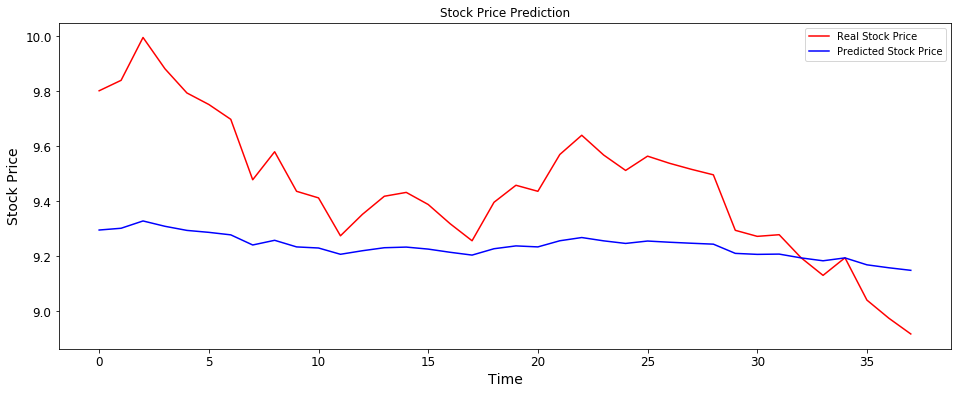

In [31]:
plt.figure(figsize=(16, 6))
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [35]:
# Make predictions on entire dataset
training_set, test_set = train_test_split(df, test_size=0.10, shuffle=False)
real_stock_price_train = training_set.iloc[:,2:3].values
print(len(df))

379


In [0]:
predicted_stock_price_train = regressor.predict(X_train)
predicted_stock_price_train = sc.inverse_transform(predicted_stock_price_train)

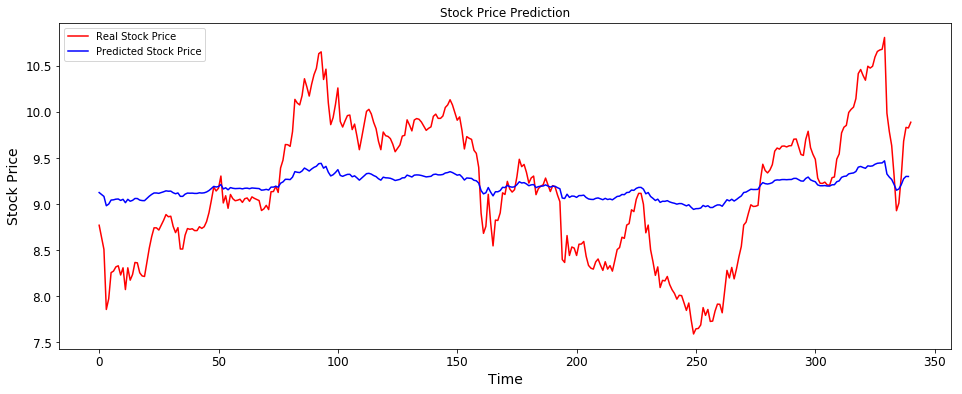

In [37]:
# Visualising the results
plt.figure(figsize=(16, 6))
plt.plot(real_stock_price_train, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price_train, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## Evaluation

In [38]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(rmse)

0.29458825913931264
